In [1]:
!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename="lena.jpg"

(1960, 1960, 3)


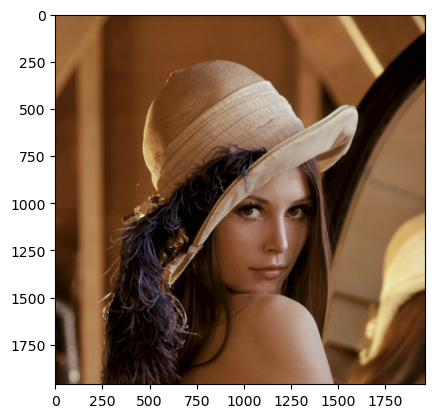

In [3]:
img=cv2.imread(filename, cv2.IMREAD_COLOR)
print(img.shape)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

[[104 104 104 ...  30  28  30]
 [104 104 105 ...  31  27  29]
 [104 105 105 ...  32  30  33]
 ...
 [ 31  30  30 ...  74  72  71]
 [ 32  30  29 ...  74  73  73]
 [ 36  32  30 ...  72  74  76]]


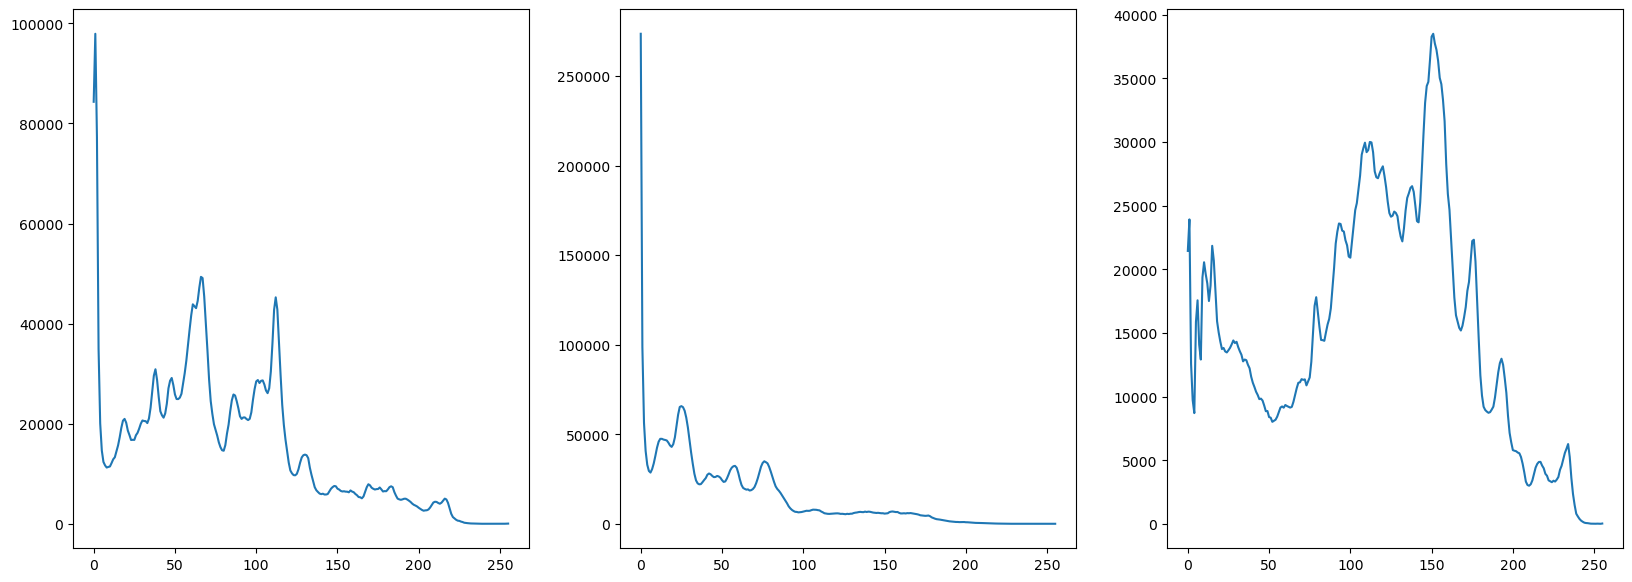

In [4]:
def genHistogram(array):
    hist=[0]*256   #mảng 0 1 chiều để tính xác suất các mức xám
    flatten_data=array.flatten()  #đưa ảnh về mảng một chiều
    for item in flatten_data:
        hist[item] += 1       # tính số lần xuất hiện của các mức xám
    return hist


print(img[:,:,1])
greenHist=genHistogram(img[:,:,1])   # kênh màu green
blueHist=genHistogram(img[:,:,0])
redHist=genHistogram(img[:,:,2])

fig=plt.figure(figsize=[20,7])

p=plt.subplot(131)
plt.plot(greenHist)

p=plt.subplot(132)
plt.plot(blueHist)

p=plt.subplot(133)
plt.plot(redHist)



[[104 104 104 ...  30  28  30]
 [104 104 105 ...  31  27  29]
 [104 105 105 ...  32  30  33]
 ...
 [ 31  30  30 ...  74  72  71]
 [ 32  30  29 ...  74  73  73]
 [ 36  32  30 ...  72  74  76]]


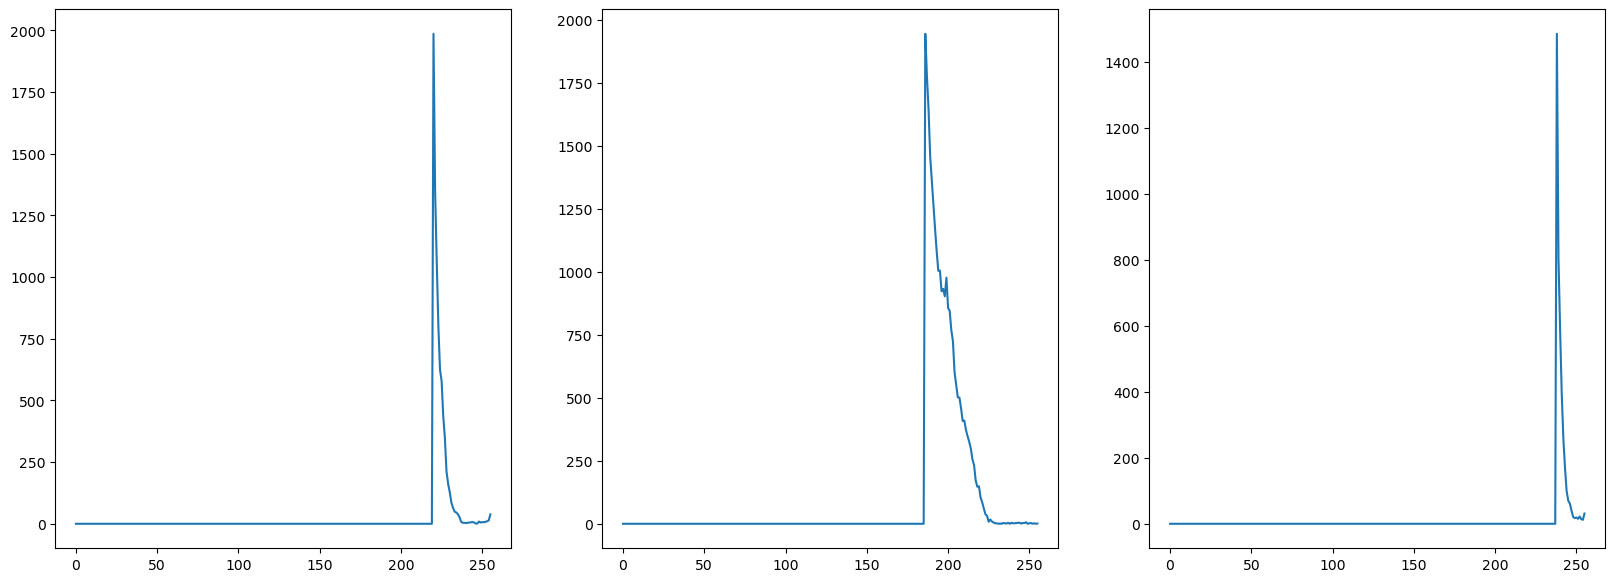

In [5]:
#Cái nào cao quá cho về 0
def suppressSpikes(array, threshold=2000):
    for i, value in enumerate(array):
        if value > threshold:
            array[i]=0
print(img[:,:,1])
greenHist=genHistogram(img[:,:,1])   # kênh màu green
blueHist=genHistogram(img[:,:,0])
redHist=genHistogram(img[:,:,2])

suppressSpikes(greenHist)
suppressSpikes(blueHist)
suppressSpikes(redHist)

fig=plt.figure(figsize=[20,7])

p=plt.subplot(131)
plt.plot(greenHist)

p=plt.subplot(132)
plt.plot(blueHist)

p=plt.subplot(133)
plt.plot(redHist)

        


In [ ]:
#Cái nào cao quá cho về 0
def suppressSpikes(histogram,channel, threshold=10000):
    suppressedValues=[]
    for i, value in enumerate(histogram):
        if value > threshold:
            suppressedValues.append(i)
            
    for i in range(channel.shape[0]):
        for j in range(channel.shape[1]):
            if channel[i][j] in suppressedValues:
                channel[i][j]=np.random.randint(50,150)

greenChannel=img[:,:,1]
blueChannel=img[:,:,0]
redChannel=img[:,:,2]

greenHist=genHistogram(greenChannel)   # kênh màu green
blueHist=genHistogram(blueChannel)
redHist=genHistogram(redChannel)

suppressSpikes(greenHist,greenChannel )
suppressSpikes(blueHist, blueChannel)
suppressSpikes(redHist, redChannel)

fig=plt.figure(figsize=[20,7])

p=plt.subplot(131)
plt.plot(greenHist)

p=plt.subplot(132)
plt.plot(blueHist)

p=plt.subplot(133)
plt.plot(redHist)

        

[[104 104 104 ...  30  28  30]
 [104 104 105 ...  31  27  29]
 [104 105 105 ...  32  30  33]
 ...
 [ 31  30  30 ...  74  72  71]
 [ 32  30  29 ...  74  73  73]
 [ 36  32  30 ...  72  74  76]]


In [ ]:
newImage=np.dstack((redChannel,greenChannel, blueChannel))
print(newImage)
print(newImage.shape)
plt.imshow(newImage)

In [ ]:
greenChannel=newImage[:,:,1]
blueChannel=newImage[:,:,0]
redChannel=newImage[:,:,2]

greenHist=genHistogram(greenChannel)   # kênh màu green
blueHist=genHistogram(blueChannel)
redHist=genHistogram(redChannel)

fig=plt.figure(figsize=[20,7])

p=plt.subplot(131)
plt.plot(greenHist)

p=plt.subplot(132)
plt.plot(blueHist)

p=plt.subplot(133)
plt.plot(redHist)